# Stock Price Predictor


## Part 1 - Data Preprocessing

In [1]:
!pip install --upgrade yfinance

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

[*********************100%***********************]  1 of 1 completed


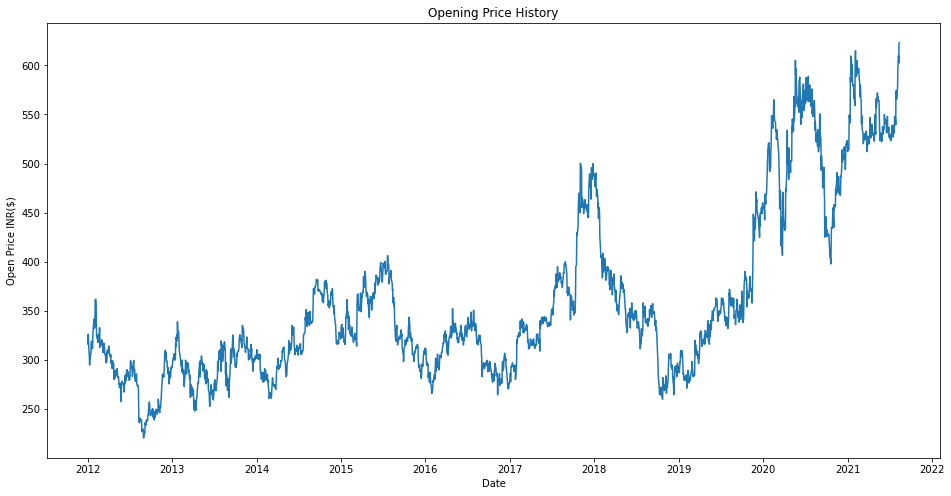

array([[316.31243896],
       [319.06698608],
       [326.09103394],
       ...,
       [595.        ],
       [596.95001221],
       [597.        ]])

In [3]:
import yfinance as yf
data = yf.download('BHARTIARTL.NS','2012-01-01')
plt.figure(figsize=(16,8))
plt.title("Opening Price History")
plt.plot(data["Open"])
plt.xlabel("Date")
plt.ylabel("Open Price INR($)")
plt.show()
dataset=data.filter(["Open"]).values
trainingDataLength = int(len(dataset)*(0.95))
training_set = dataset[0:trainingDataLength, :]
training_set

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### Fitting the RNN to the Training set

In [16]:
history = regressor.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
69/69 [==============================] - 14s 112ms/step - loss: 0.0139
Epoch 2/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0063
Epoch 3/40
69/69 [==============================] - 8s 112ms/step - loss: 0.0046
Epoch 4/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0043
Epoch 5/40
69/69 [==============================] - 8s 112ms/step - loss: 0.0037
Epoch 6/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0034
Epoch 7/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0033
Epoch 8/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0030
Epoch 9/40
69/69 [==============================] - 8s 114ms/step - loss: 0.0030
Epoch 10/40
69/69 [==============================] - 8s 114ms/step - loss: 0.0029
Epoch 11/40
69/69 [==============================] - 8s 113ms/step - loss: 0.0027
Epoch 12/40
69/69 [==============================] - 8s 112ms/step - loss: 0.0024
Epoch 13/40
69/69 [=====

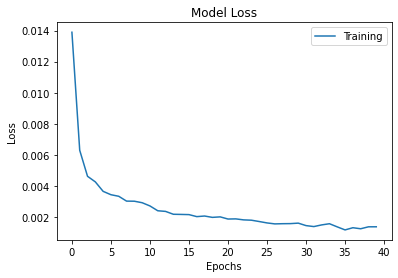

In [17]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history.history['loss'])
plt.legend(['Training'])
plt.show()

In [18]:
regressor.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [19]:
!zip -r model.zip model

updating: model/ (stored 0%)
updating: model/variables/ (stored 0%)
updating: model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: model/variables/variables.index (deflated 69%)
updating: model/keras_metadata.pb (deflated 93%)
updating: model/saved_model.pb (deflated 90%)
updating: model/assets/ (stored 0%)


## Part 3 - Making the predictions and visualising the results

### Getting the predicted stock price

In [20]:
import tensorflow
regressor = tensorflow.keras.models.load_model('model')
dataset_total = dataset
dataset_test = dataset[trainingDataLength:, :]
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_prices = regressor.predict(X_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

### Visualising the results

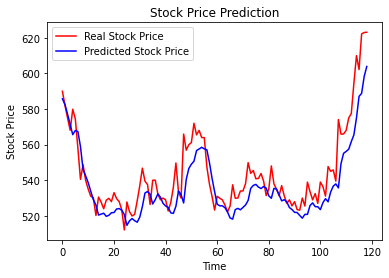

In [21]:
plt.plot(dataset_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [22]:
import math
MSE = np.square(np.subtract(dataset_test,predicted_stock_prices)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)

12.175206236174073
